In [3]:
#HW3. 
import numpy as np

#The first method calculates the derivative using forward difference
#Input: a function from the numpy library, a position x, and a value for closeness dx
#Output: the value of that derivative at position x
def derifw(y,x,dx):
    return (y(x+dx)-y(x))/dx

#The second method calculates the derivative using central difference
#Input: a function from the numpy library, a position x, and a value for closeness dx
#Output: the value of that derivative at position x
def dericd(y,x,dx):
    return (y(x+dx/2) - y(x-dx/2))/dx

#The third method calculates the derivative is extrapolated difference
#Input: a function from the numpy library, a position x, and a value for closeness dx
#Output: the value of that derivative at position x
def deried(y,x,dx):
    return ((((y(x+dx/4) - y(x-dx/4))/dx)*8/3) - (dericd(y,x,dx)/3))


In [4]:
#Method to graph the error vs dx size using the three different algorithms 
#Input: A value to which feed the function
#Output: None
def graph_x(x):
    #lists to hold our values
    maxi = 16
    dx_list = [0]*maxi
    values_fwd = [0]*maxi
    values_cen = [0]*maxi
    values_ext = [0]*maxi
    values_true = [0]*maxi
    values_errorfwd = [0]*maxi
    values_errorcen = [0]*maxi
    values_errorext = [0]*maxi
    holder = 5.0
    best_dxfwd = 1.0
    best_dxcen = 1.0
    best_dxext = 1.0

    #iterate to generate lists
    for i in range(1,maxi):
        dx = 10**(-i)
        dx_list[maxi-i] = dx
        #print(dx)
        values_fwd[maxi-i] = derifw(y, x, dx)
        values_cen[maxi-i] = dericd(y, x, dx)
        values_ext[maxi-i] = deried(y, x, dx)
        values_true[maxi-i] = -np.sin(x)
        values_errorfwd[maxi-i] = abs(values_fwd[maxi-i] - values_true[maxi-i])
        values_errorcen[maxi-i] = abs(values_cen[maxi-i] - values_true[maxi-i])
        values_errorext[maxi-i] = abs(values_ext[maxi-i] - values_true[maxi-i])
        
    #calculate best dx to choose for forward algorithm
    for i in range(1, maxi):
        if((holder > values_errorfwd[i]) and (values_errorfwd[i] != 0)):
            #print('yes')
            holder = values_errorfwd[i]
            best_dxfwd = 10**(-maxi+i)
            
    #calculate best dx to choose for central algorithm        
    for i in range(1, maxi):
        if((holder > values_errorcen[i]) and (values_errorcen[i] != 0)):
            #print('yes')
            holder = values_errorcen[i]
            best_dxcen = 10**(-maxi+i)
            
    #calculate best dx to choose for extrapolated algorithm        
    for i in range(1, maxi):
        if((holder > values_errorext[i]) and (values_errorext[i] != 0)):
            #print('yes')
            holder = values_errorext[i]
            best_dxext = 10**(-maxi+i)
    
    #print(dx_list)
    #print(values_errorfwd)
    #print(values_errorcen)
    #print(values_errorext)  

    #Print results from above lists
    import matplotlib.pyplot as plt

    plt.plot(dx_list, values_errorfwd, 'b-', lw=2) 
    plt.plot(dx_list, values_errorext, 'm-', lw=2) 
    plt.plot(dx_list, values_errorcen, 'g-', lw=2)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('dx')
    plt.ylabel('Error')
    plt.show()
    
    if(best_dxfwd != 1):
        print("OPTIMAL DX FORWARD:", best_dxfwd)
        
    if(best_dxcen != 1):
        print("OPTIMAL DX CENTRAL:", best_dxcen)
        
    if(best_dxext != 1):
        print("OPTIMAL DX EXTRAPOLATED:", best_dxext)
        
    return

PART I
Forward Difference: -0.907201555101
Central Difference: -0.909293638091
Extrapolated Difference: -0.909297426824
Actual: -0.909297426826

PART II


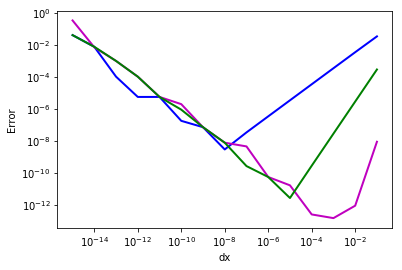

OPTIMAL DX FORWARD: 1e-08
OPTIMAL DX CENTRAL: 1e-05
OPTIMAL DX EXTRAPOLATED: 0.001

PART III


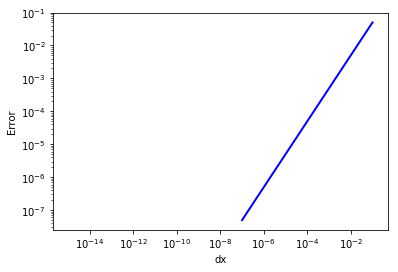

OPTIMAL DX FORWARD: 1e-07

Finished


In [11]:
#Main portion of program
x = 2.
dx = 0.01
y = np.cos

#Print derivate of y at x (Bullet 1)
print("PART I")
print("Forward Difference:", derifw(y,x,dx))
print("Central Difference:", dericd(y,x,dx))
print("Extrapolated Difference:", deried(y,x,dx))
print("Actual:", -np.sin(x))
print("")
print("PART II")
graph_x(np.pi/4)
#The reason there are no error graphes for the Central Difference and Extrapolated Difference about x = 0
#Is because they rely on f'(3) and all other odd derivates of f. Since the odd derivatives of cos is sin
#there are no errors about x = 0, pi, 2*pi,...,n*pi
print("")
print("PART III")
graph_x(0)

print("")
print("Finished")
